In this example, we will implement a simple example of active transport. This particular model is derived from work by Jönsson et al. (2006) describing the transport of auxin. We refer to it as "transport against the gradient" because it assumes that cells are somehow able to sense difference in auxin concentrations relative to their neighbors and relocate their auxin pumps to transport auxin towards cells of higher concentrations, i.e. the opposite direction of spontaneous diffusion/passive transport.

# Preparation

In [1]:
%matplotlib notebook

# Imports
We are obviously going to need multicell, but we are also going to need numpy to initialize the system with random noise.

In [2]:
import multicell
import numpy as np

# Problem definition

The tissue will be a 30x30x1 grid of cubic cells.

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(10, 10, 1)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.19 s)


We define one variable called a.

In [4]:
sim.register_cell_variable("a")

We then define the differential equation of a. This requires defining some constants and their values.

*D_a* is the diffusion coefficient, and *T_a* is the active transport coefficient.

In [5]:
sim.set_constants({"D_a": 0.04, "T_a": 1.})

In this example, the differential equation uses two built-in functions of the simulation objects: `simulation.diffusion` and `simulation.transport_against_gradient`. These functions automatically compute the net flows due to diffusion and active transport, respectively, for all cells. They also help the Simulation object to integrate the system of differential equations efficiently by contributing to the determination of the structure of the Jacobian matrix, as mentioned in the example about diffusion. They can therefore not be replaced by any user-defined function. User-defined function should be used through the `Simulation._transport` function.

In [6]:
def da_dt(simulation, c_a, D_a, T_a, adjacency_matrix):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + simulation.transport_against_gradient(T_a, c_a, adjacency_matrix)

sim.set_ODE("a", da_dt)

## Initial conditions

If we started with perfectly uniform concentrations, there would be no differences in concentrations between cells at all, and the system would remain in that unstable steady state. To break this symmetry, we initialize the system with some random noise.

We first need to signal the simulation that all variables have been defined and that arrays can now be reserved for their values.

In [7]:
sim.initialize_cell_variables()

We then create a numpy aray of random values between 0.999 and 1.001 to serve as initial concentration values.

In [8]:
a0 = np.random.uniform(0.999, 1.001, sim.n_cells)
sim.set_cell_variable("a", a0)

## Duration

Finally, we set the duration of the simulation to $10^6$ (arb. units), which is long enough to reach the steady state.

In [9]:
sim.set_duration(4e3)
sim.set_n_time_steps(10)

## Rendering

We register a viewer that will display the concentrations of a.

In [10]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 17, "view": (90, -90), "axes": False})

# Visualization of the initial conditions

We can check that the tissue is initially uniform.

<IPython.core.display.Javascript object>


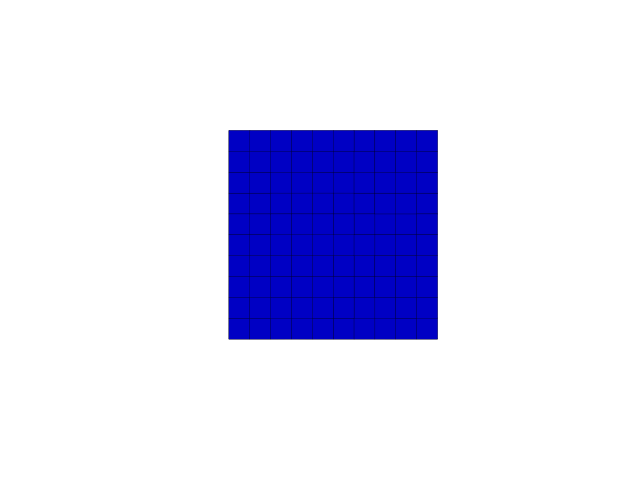

Time: 0.0
c_a: from 0.998494123597 to 1.00122157412


In [11]:
sim.renderer.display("c_a")

# Simulation

We can then run the simulation to obtain the steady state. On our computer (Intel Core i7), the simulation took 3 min.

Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 4.98081493378 seconds


<IPython.core.display.Javascript object>


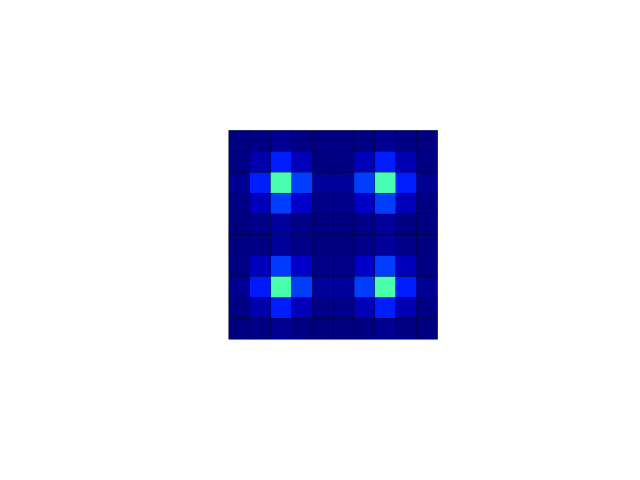

Time: 400.0
c_a: from 0.0143746259915 to 7.46730592437
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 7.27859187126 seconds


<IPython.core.display.Javascript object>


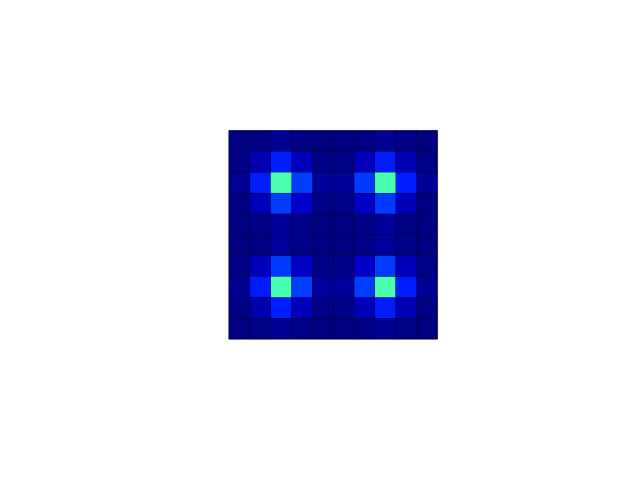

Time: 800.0
c_a: from 0.0143947450892 to 7.49303726652
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 7.06273198128 seconds


<IPython.core.display.Javascript object>


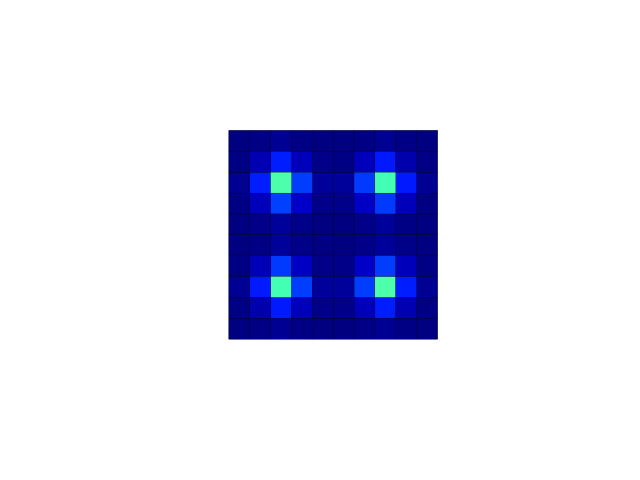

Time: 1200.0
c_a: from 0.0142945186151 to 7.55162467055
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 7.24105501175 seconds


<IPython.core.display.Javascript object>


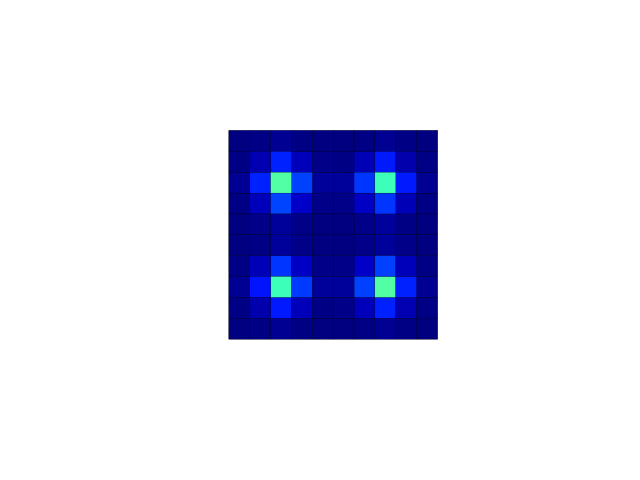

Time: 1600.0
c_a: from 0.0140342352358 to 7.6959364667
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 6.86885595322 seconds


<IPython.core.display.Javascript object>


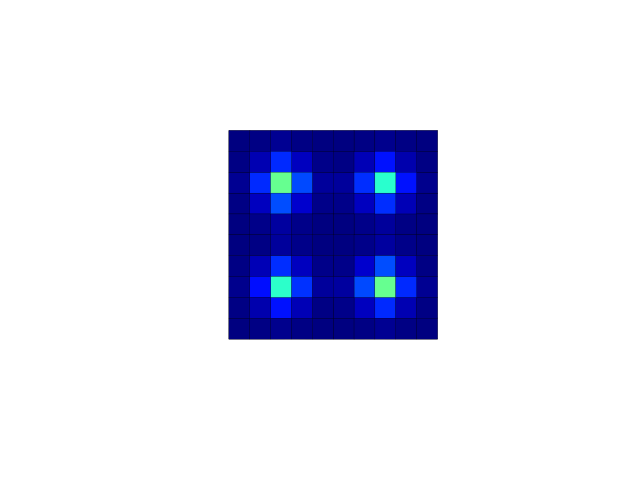

Time: 2000.0
c_a: from 0.013371494143 to 8.05226085795
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 7.14204096794 seconds


<IPython.core.display.Javascript object>


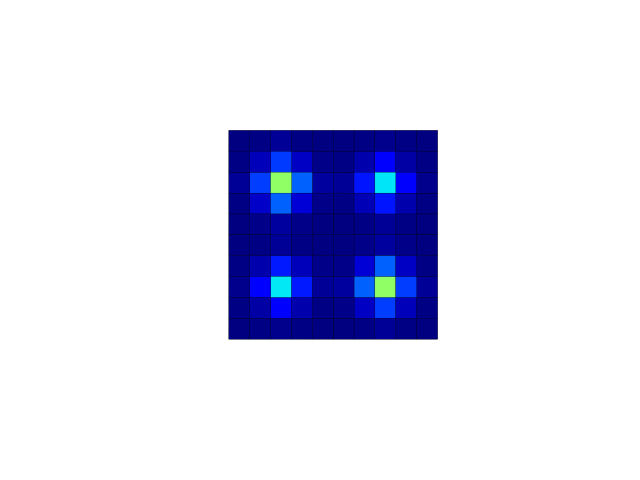

Time: 2400.0
c_a: from 0.0116994743534 to 8.93754437633
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 7.91525697708 seconds


<IPython.core.display.Javascript object>


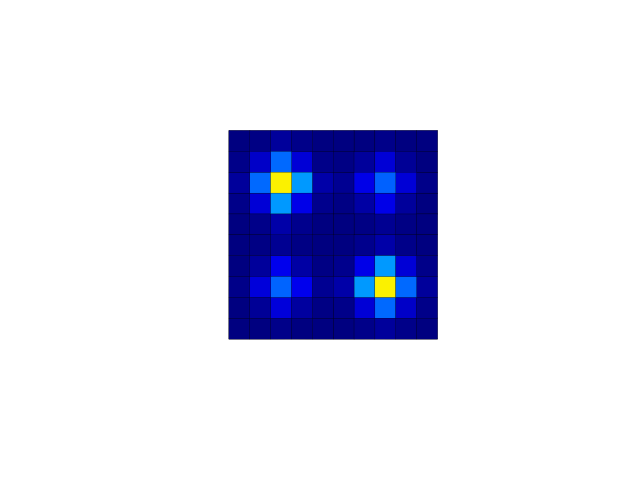

Time: 2800.0
c_a: from 0.00742708804127 to 11.1464375966
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 5.31265211105 seconds


<IPython.core.display.Javascript object>


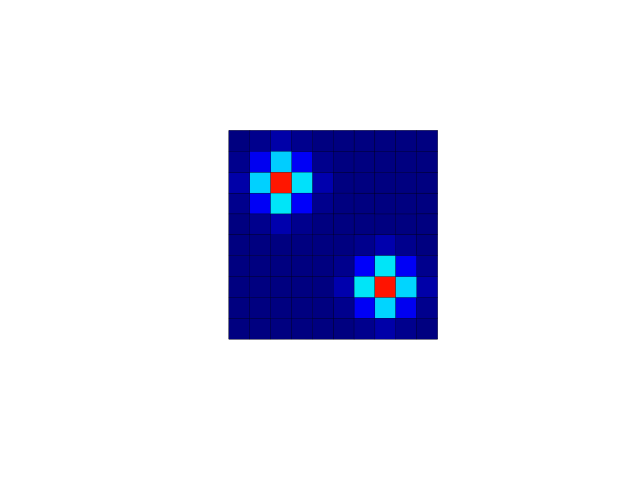

Time: 3200.0
c_a: from 1.47753809921e-06 to 15.1402937498
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 5.14353895187 seconds


<IPython.core.display.Javascript object>


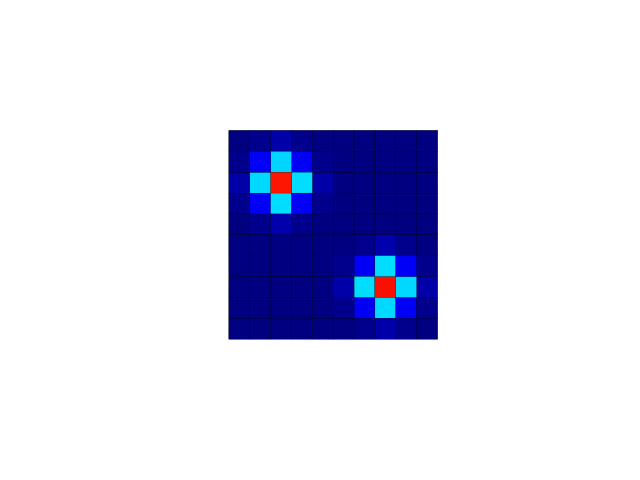

Time: 3600.0
c_a: from 1.45617827884e-06 to 15.1476266865
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 3.89041090012 seconds


<IPython.core.display.Javascript object>


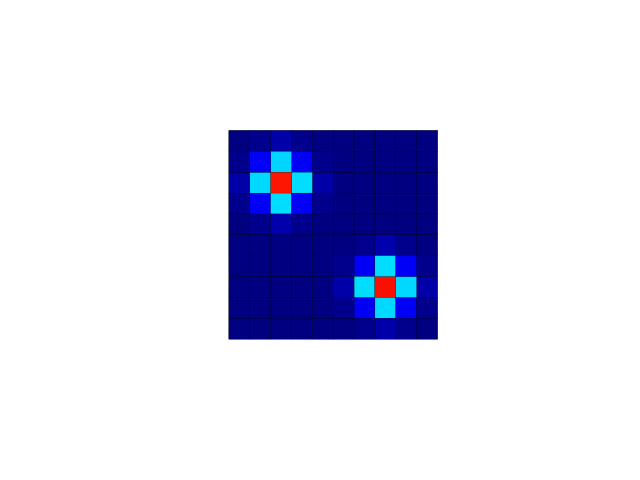

Time: 4000.0
c_a: from 1.45616618627e-06 to 15.1476464135


In [12]:
sim.simulate()

We can see the tissue is no longer uniform. Two islets of higher concentrations have appeared. This shows that transport against the gradient can create heterogeneity in a tissue.

The size of the islets is dependent on the ratio of the diffusion coefficient to the transport coefficient. The stronger the diffusion, the larget the islets.